# Angler tests

In [25]:
import sys; sys.path.append("../..") # use local neural_maxwell package

import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

from tqdm import tqdm, tqdm_notebook

from angler import Simulation
from angler.derivatives import unpack_derivs

from neural_maxwell.datasets.generators import * 
from neural_maxwell.constants import *
from neural_maxwell.datasets.fdfd import *

np.set_printoptions(precision=3, linewidth=120)

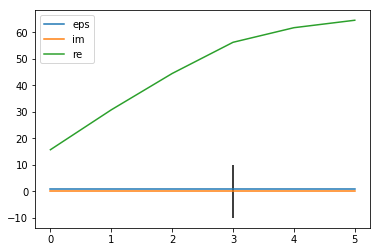

In [40]:
DEVICE_LENGTH = 6
BUFFER_LENGTH = 0
NPML = 0

total_length = DEVICE_LENGTH + 2 * BUFFER_LENGTH + 2 * NPML
start = NPML + BUFFER_LENGTH
end = start + DEVICE_LENGTH

epsilons = np.ones(DEVICE_LENGTH) #vacuum

# set permittivity and reflection zone
perms = np.ones(total_length, dtype=np.float64)
# perms[start-BUFFER_LENGTH:start] = BUFFER_PERMITTIVITY
perms[start:end] = epsilons
# perms[end:end+BUFFER_LENGTH] = BUFFER_PERMITTIVITY

# src_x = NPML + BUFFER_LENGTH
src_x = int(DEVICE_LENGTH / 2)

sim = Simulation(OMEGA_1550, perms, dL, [NPML, 0], "Ez", L0=L0, use_dirichlet_bcs=True)

sim.src[src_x] = 1j

clip0 = NPML + BUFFER_LENGTH
clip1 = -(NPML + BUFFER_LENGTH)

Hx, Hy, Ez = sim.solve_fields()

fix, ax = plt.subplots(1,1)# figsize = (12,12))
ax.plot(perms, label="eps")
ax.plot(np.imag(Ez), label="im")
ax.plot(np.real(Ez), label="re")
ax.vlines(src_x, -10,10)
ax.legend()
plt.show()

# ax[1].plot(perms, label="eps")
# ax[1].plot(np.abs(Ez), label="abs")
# ax[1].plot(np.angle(Ez), label="angle")
# ax[1].vlines(src_x, -10,10)
# ax[1].legend()
# plt.show()

In [44]:
A = sim.A.todense()
Dyb=sim.derivs["Dyb"].todense()
Dyf=sim.derivs["Dyf"].todense()
Dxb=sim.derivs["Dxb"].todense()
Dxf=sim.derivs["Dxf"].todense()

print(np.allclose(-Dxb.T, Dxf))

print("A: \n", A)
print("Dxf dot Dxb: \n", np.dot(Dxf, Dxb))
# print("Dyb: \n", Dyb)
# print("Dyf: \n", Dyf)
print("Dxb: \n", Dxb)
print("Dxf: \n", Dxf)

True
A: 
 [[-6.228e+14+0.j  3.183e+14+0.j  0.000e+00+0.j  0.000e+00+0.j  0.000e+00+0.j  0.000e+00+0.j]
 [ 3.183e+14+0.j -6.228e+14+0.j  3.183e+14+0.j  0.000e+00+0.j  0.000e+00+0.j  0.000e+00+0.j]
 [ 0.000e+00+0.j  3.183e+14+0.j -6.228e+14+0.j  3.183e+14+0.j  0.000e+00+0.j  0.000e+00+0.j]
 [ 0.000e+00+0.j  0.000e+00+0.j  3.183e+14+0.j -6.228e+14+0.j  3.183e+14+0.j  0.000e+00+0.j]
 [ 0.000e+00+0.j  0.000e+00+0.j  0.000e+00+0.j  3.183e+14+0.j -6.228e+14+0.j  3.183e+14+0.j]
 [ 0.000e+00+0.j  0.000e+00+0.j  0.000e+00+0.j  0.000e+00+0.j  3.183e+14+0.j -3.044e+14+0.j]]
Dxf dot Dxb: 
 [[-800.+0.j  400.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j]
 [ 400.+0.j -800.+0.j  400.+0.j    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j  400.+0.j -800.+0.j  400.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j  400.+0.j -800.+0.j  400.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j  400.+0.j -800.+0.j  400.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j    0.+0.j  400.+0.j -400.+0.j]]
Dxb: 
 [[ 20.+0.j   0.+0.j   0.+0.j  

/Users/ben/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


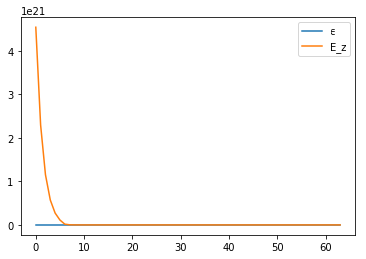

In [5]:
eps = PermittivityGenerators1D.random_layers()
sim = Simulation1D(buffer_length=0, use_dirichlet_bcs=True)
permittivities, src_x, Hx, Hy, Ez = sim.solve(eps)

plt.plot(permittivities, label='ϵ')
plt.plot(Ez, label="E_z")
plt.legend()
plt.show()

np_curl_curl_op, _ = sim.get_operators()
curl_curl_op = torch.tensor(np.asarray(np.real(np_curl_curl_op)))
Ez = np.real(Ez)

In [4]:
permittivities

array([-1.000e+20, -1.000e+20, -1.000e+20, -1.000e+20,  1.075e+01,
        1.075e+01,  1.075e+01,  1.075e+01,  1.075e+01,  1.075e+01,
        1.075e+01,  1.075e+01,  1.075e+01,  1.075e+01,  1.075e+01,
        1.075e+01,  1.075e+01,  1.075e+01,  1.075e+01,  1.041e+01,
        1.041e+01,  1.041e+01,  1.041e+01,  1.041e+01,  1.041e+01,
        1.041e+01,  1.041e+01,  1.041e+01,  1.041e+01,  1.041e+01,
        1.041e+01,  1.041e+01,  1.041e+01,  1.957e+01,  1.957e+01,
        1.957e+01,  1.957e+01,  1.957e+01,  1.957e+01,  1.957e+01,
        8.550e+00,  8.550e+00,  8.550e+00,  8.550e+00,  8.550e+00,
        8.550e+00,  8.550e+00,  8.550e+00,  1.697e+01,  1.697e+01,
        1.697e+01,  1.697e+01,  1.697e+01,  1.697e+01,  1.697e+01,
        1.697e+01,  1.697e+01,  1.697e+01,  1.697e+01,  1.697e+01,
        1.697e+01,  1.697e+01,  1.697e+01,  1.697e+01,  1.697e+01,
        1.697e+01,  1.000e+00,  1.000e+00, -1.000e+20, -1.000e+20,
       -1.000e+20, -1.000e+20])

In [5]:
residuals = maxwell_residual_1d(torch.tensor([Ez]), torch.tensor([permittivities]), curl_curl_op, add_buffer=False)

In [6]:
residuals.numpy().flatten()

array([ 6.079e-10,  9.460e-10,  8.643e-10,  3.990e-10, -2.434e-10,
       -7.777e-10, -9.669e-10, -7.270e-10, -1.644e-10,  4.711e-10,
        8.976e-10,  9.257e-10,  5.430e-10, -8.068e-11, -6.686e-10,
       -9.295e-10, -8.119e-10, -3.453e-10,  2.698e-10,  7.688e-10,
        9.374e-10,  7.030e-10,  1.663e-10, -4.418e-10, -8.600e-10,
       -9.085e-10, -5.664e-10,  1.914e-11,  5.965e-10,  1.725e-09,
        9.378e-10, -6.060e-10, -1.527e+00, -2.449e-09, -1.263e-09,
        9.421e-10,  1.043e-09,  1.305e-09,  1.106e-09,  5.161e-10,
       -2.566e-10, -9.385e-10, -1.289e-09, -1.183e-09, -1.309e-09,
        6.466e-10,  2.150e-09,  2.149e-09,  6.453e-10, -1.310e-09,
       -2.349e-09, -1.745e-09,  7.945e-11,  1.848e-09,  2.324e-09,
        1.175e-09, -7.966e-10, -2.211e-09, -2.078e-09, -4.924e-10,
        1.438e-09,  2.362e-09,  9.631e-11,  4.923e-11])

In [7]:
eps = PermittivityGenerators2D.ellipse()
sim = Simulation2D()
permittivities, _, _, _, _, Ez = sim.solve(eps)
np_curl_curl_op, _ = sim.get_operators()
curl_curl_op = torch.tensor(np.asarray(np.real(np_curl_curl_op)))
Ez = np.real(Ez)

[[ 6.061e-11  1.051e-10  1.225e-10 ... -2.257e-11 -3.599e-11 -2.530e-11]
 [ 1.072e-10  1.848e-10  2.131e-10 ... -5.892e-11 -7.819e-11 -5.264e-11]
 [ 1.302e-10  2.221e-10  2.505e-10 ... -1.128e-10 -1.263e-10 -8.089e-11]
 ...
 [ 8.901e-12  2.817e-11  6.385e-11 ... -4.144e-10 -4.250e-10 -2.657e-10]
 [ 2.133e-11  4.945e-11  8.772e-11 ... -2.963e-10 -3.065e-10 -1.920e-10]
 [ 1.637e-11  3.601e-11  6.029e-11 ... -1.537e-10 -1.601e-10 -1.005e-10]]


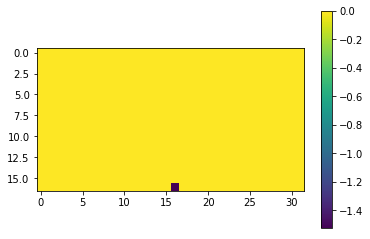

In [20]:
residuals = maxwell_residual_2d(torch.tensor([Ez]), torch.tensor([permittivities]), curl_curl_op, add_buffer=False, trim_buffer=True).numpy()[0]
print(residuals)

J = np.zeros((32, 32))
J[16, 16] = -(SCALE / L0) * MU0 * OMEGA_1550
    
out = residuals - J

plt.imshow(out[0:17])
plt.colorbar()
plt.show()

In [18]:
out[16,16]

7.349618291740967e-08

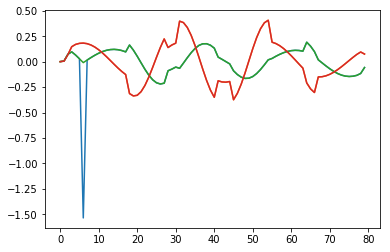

In [31]:
curl_op, eps_op = get_A_ops_1d(np.ones(perms.shape), NPML)
curl_op = np.asarray(curl_op)
E = Ez.flatten()

curl_curl_E = (SCALE / L0**2) * curl_op @ E
epsilon_E = (SCALE * -OMEGA**2 * MU0 * EPSILON0) * perms * E

plt.plot(np.real(curl_curl_E))
plt.plot(np.imag(curl_curl_E))
plt.plot(np.real(epsilon_E))
plt.plot(np.imag(epsilon_E))

plt.show()

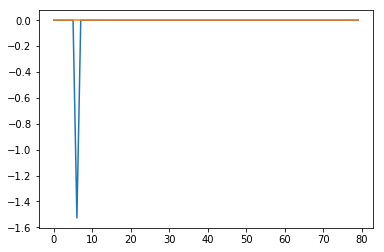

In [32]:
zero = curl_curl_E-epsilon_E
plt.plot(np.real(zero))
plt.plot(np.imag(zero))
plt.show()

In [35]:
(curl_curl_E+epsilon_E)[16+32]

-1.5268139564659675

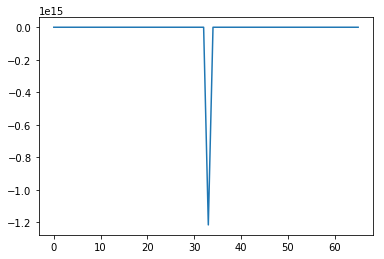

In [23]:
A = sim.A.todense()
curl=np.real(np.asarray(A[15:-15,15:-15] @ np.real(Ez)[15:-15].flatten()))[0]
plt.plot(curl)
plt.show()

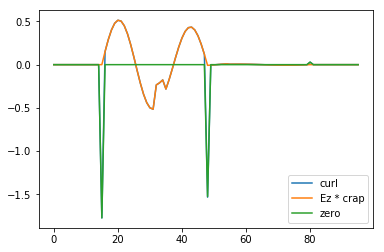

In [22]:
# plt.plot(perms[15:-15], label="eps")

curl_curl, other = get_curl_operator()

# fields = np.array([np.zeros(16), np.real(Ez)[16:-16], np.zeros(16)]).flatten()
fields = np.pad(np.real(Ez).flatten()[16:-16], (16,16), 'constant')

# curl=np.real(np.asarray(curl_curl[15:-15,15:-15] @ np.real(Ez)[15:-15].flatten()))[0]
curl=np.real(SCALE / (L0**2) * np.asarray(curl_curl @ fields))[0]
plt.plot(curl, label="curl")

# o2 = perms[15:-15] * np.real(np.asarray(other[15:-15,15:-15] @ np.real(Ez)[15:-15].flatten()))[0]
# o2 = perms * np.real(np.asarray(other @ fields))[0]
o2 = (SCALE * -OMEGA**2 * MU0 * EPSILON0) * perms * fields

src = np.zeros(fields.shape)
src[32] = SCALE * OMEGA

plt.plot(o2, label='Ez * crap')
# plt.ylim([-200,200])

zero = curl - o2
plt.plot(zero, label='zero')

# plt.plot(fields, label='fields')
plt.legend()
plt.show()

In [23]:
Ez.shape

(96, 1)

In [25]:
zero[16]

4.190374297552424e-09

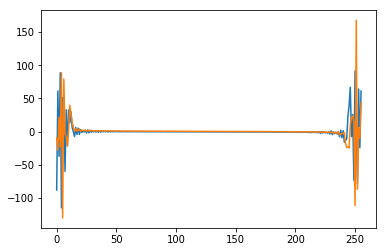

In [16]:
fft = np.fft.fft(Ez[0][32:-32])
plt.plot(np.real(fft))
plt.plot(np.imag(fft))
# plt.plot(np.fft.ifft(fft))
# plt.plot(perms[0], label="eps")

plt.show()

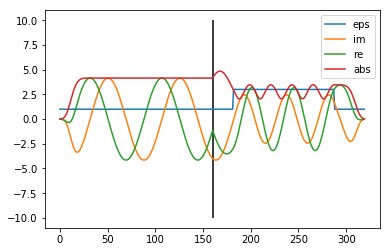

In [110]:
plt.plot(perms[0], label="eps")
plt.plot(np.imag(Ez[0]), label="im")
plt.plot(np.real(Ez[0]), label="re")
plt.vlines(src_x, -10,10)
plt.plot(np.abs(Ez[0]), label="abs")
# plt.plot(np.angle(Ez[0]), label="angle")
plt.legend()
plt.show()

In [63]:
from angler import Simulation
import numpy as np
import scipy

omega = 2*np.pi*2e14
eps_r = np.ones((8,1))
eps_r[:2] = -1e19
eps_r[-2:] = -1e19
S = Simulation(omega, eps_r, 0.01, [0, 0], 'Ez')
A = S.A.todense()
null = scipy.linalg.null_space(A).T

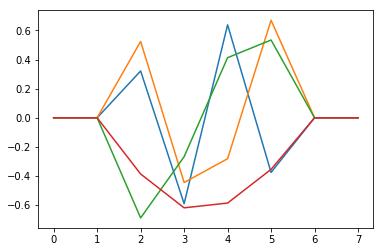

In [64]:
freqs = [np.fft.fft(n[2:-2]) for n in null]
# [plt.plot(np.real(freq)) for freq in freqs]
[plt.plot(np.real(n)) for n in null]
plt.show()

(200,)